 # Ex6: To implement a Machine Learning Classification model using a Decision Tree Classifier algorithm and enhance the model by K Fold and GridSearchCV cross-validation.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Read dataset
data = pd.read_csv(r"C:\Users\Hp\Desktop\tennis - tennis.csv")


In [3]:
# Handle any missing values if present
data.dropna(inplace=True)

In [4]:
# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

In [5]:
# Split features and target variable
X = data_encoded.drop('play_yes', axis=1)  # Features
y = data_encoded['play_yes']  # Target variable


In [6]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Decision Tree Classifier model with criterion='entropy'

In [7]:
dt_classifier_entropy = DecisionTreeClassifier(criterion='entropy')

In [8]:
# Fit the model
dt_classifier_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [9]:
# Predict on the test set
y_pred_entropy = dt_classifier_entropy.predict(X_test)


In [10]:
# Calculate evaluation metrics
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
precision_entropy = precision_score(y_test, y_pred_entropy,zero_division=1)
recall_entropy = recall_score(y_test, y_pred_entropy)
f1_entropy = f1_score(y_test, y_pred_entropy)
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)


In [11]:
# Print evaluation metrics
print("Evaluation Metrics with Criterion 'entropy':")
print("Accuracy:", accuracy_entropy)
print("Precision:", precision_entropy)
print("Recall:", recall_entropy)
print("F1-score:", f1_entropy)
print("Confusion Matrix:\n", conf_matrix_entropy)

Evaluation Metrics with Criterion 'entropy':
Accuracy: 0.6666666666666666
Precision: 1.0
Recall: 0.5
F1-score: 0.6666666666666666
Confusion Matrix:
 [[1 0]
 [1 1]]


#  Decision Tree Classifier model with criterion='gini'

In [12]:
dt_classifier_gini = DecisionTreeClassifier(criterion='gini')


In [13]:
# Fit the model
dt_classifier_gini.fit(X_train, y_train)


DecisionTreeClassifier()

In [14]:
# Predict on the test set
y_pred_gini = dt_classifier_gini.predict(X_test)


In [15]:
# Calculate evaluation metrics
accuracy_gini = accuracy_score(y_test, y_pred_gini)
precision_gini = precision_score(y_test, y_pred_gini,zero_division=1)
recall_gini = recall_score(y_test, y_pred_gini)
f1_gini = f1_score(y_test, y_pred_gini)
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)

In [16]:
# Print evaluation metrics
print("\nEvaluation Metrics with Criterion 'gini':")
print("Accuracy:", accuracy_gini)
print("Precision:", precision_gini)
print("Recall:", recall_gini)
print("F1-score:", f1_gini)
print("Confusion Matrix:\n", conf_matrix_gini)


Evaluation Metrics with Criterion 'gini':
Accuracy: 0.3333333333333333
Precision: 1.0
Recall: 0.0
F1-score: 0.0
Confusion Matrix:
 [[1 0]
 [2 0]]


# Visualize the decision tree with criterion='entropy'

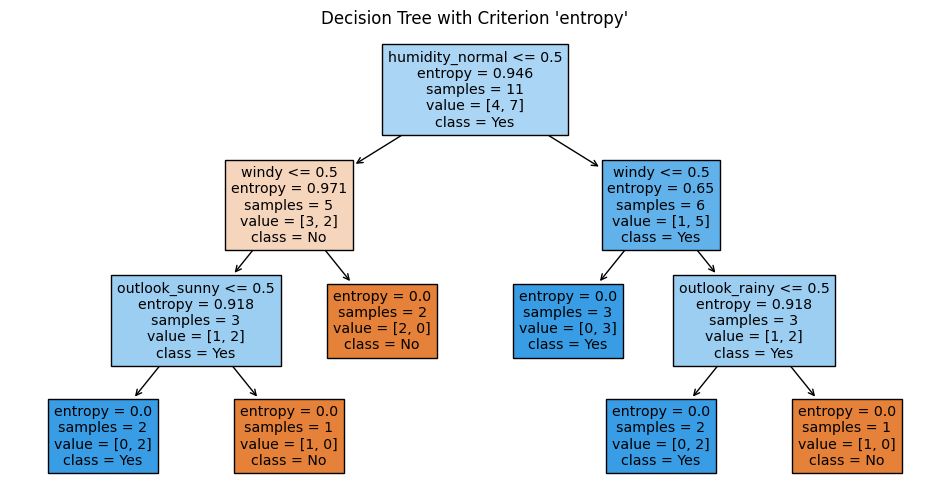

In [17]:

plt.figure(figsize=(12, 6))
plot_tree(dt_classifier_entropy, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree with Criterion 'entropy'")
plt.show()

# Visualize the decision tree with criterion='gini'

In [77]:

plt.figure(figsize=(12, 6))
plot_tree(dt_classifier_gini, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree with Criterion 'gini'")
plt.show()

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Visualize the confusion matrix for criterion='entropy'
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_entropy, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Criterion: entropy)')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['No', 'Yes'])
plt.yticks(tick_marks, ['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(conf_matrix_entropy)):
    for j in range(len(conf_matrix_entropy[i])):
        plt.text(j, i, format(conf_matrix_entropy[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix_entropy[i, j] > conf_matrix_entropy.max() / 2 else "black")

plt.show()

In [ ]:
# Visualize the confusion matrix for criterion='gini'
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_gini, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Criterion: gini)')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['No', 'Yes'])
plt.yticks(tick_marks, ['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(conf_matrix_gini)):
    for j in range(len(conf_matrix_gini[i])):
        plt.text(j, i, format(conf_matrix_gini[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix_gini[i, j] > conf_matrix_gini.max() / 2 else "black")

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
skf = StratifiedKFold(n_splits=3)

In [ ]:
# Define parameter grid for grid search
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5]
}



In [ ]:
# Initialize Decision Tree Classifier
dt_classifier_gini = DecisionTreeClassifier(criterion='gini')

# Perform grid search
grid_search = GridSearchCV(dt_classifier_gini, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_dt_classifier_gini = grid_search.best_estimator_


In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(best_dt_classifier_gini, X, y, cv=StratifiedKFold(n_splits=5))

# Calculate and print mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Mean Cross-Validation Score:", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores:", std_cv_score)